In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import imblearn

In [2]:
dataset =  pd.read_csv('transfusion.data', sep=",")
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
dataset.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [4]:
dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
dataset.shape

(748, 5)

In [7]:
dataset['whether he/she donated blood in March 2007'].value_counts().shape[0]

2

C:\Users\LAWAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='whether he/she donated blood in March 2007', ylabel='count'>

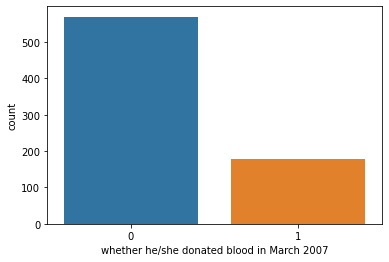

In [8]:
sns.countplot(dataset['whether he/she donated blood in March 2007'])

In [9]:
X = dataset.drop('whether he/she donated blood in March 2007',axis=1) 
y = dataset['whether he/she donated blood in March 2007']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0) 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(dataset.shape[1]-1,))) 

model.add(tf.keras.layers.Dense(dataset['whether he/she donated blood in March 2007'].value_counts().shape[0],activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [13]:
#history = model.fit(X_train, y_train, batch_size = 8, epochs= 50, verbose=2, validation_split=0.2)

<AxesSubplot:xlabel='whether he/she donated blood in March 2007', ylabel='count'>

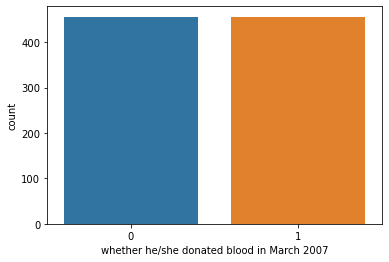

In [14]:
#Balancing of Dataset(SMOTE)

from imblearn.over_sampling import SMOTE
resampler = SMOTE(random_state = 0)
X_train_smote, y_train_smote = resampler.fit_resample(X_train,y_train)

sns.countplot(x=y_train_smote)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_smote)
X_test_s = sc.transform(X_test)

In [16]:
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=1)

5/5 [==============================] - 0s 1ms/step


In [17]:
#history = model.fit(X_train, y_train_smote, batch_size = 8, epochs= 50, verbose=2, validation_split=0.2)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

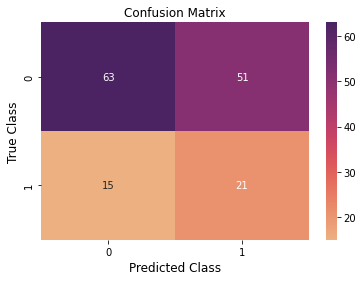

In [19]:
confusion_matrix = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

In [20]:
#evaluation of model performance

from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n' % (acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print("confusion Matrix:")
print(cm, "\n\n")
print("---------------------------------------")
result = metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(result)

accuracy:0.56


confusion Matrix:
[[63 51]
 [15 21]] 


---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       114
           1       0.29      0.58      0.39        36

    accuracy                           0.56       150
   macro avg       0.55      0.57      0.52       150
weighted avg       0.68      0.56      0.59       150

